In [1]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=4000)

word_index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'
x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train])
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])

In [2]:
len(word_index)

88584

In [3]:
x_train[0:3]

array(["[bos] this film was just brilliant casting location scenery story direction [oov] really suited the part they played and you could just imagine being there robert [oov] is an amazing actor and now the same being director [oov] father came from the same [oov] island as myself so i loved the fact there was a real connection with this film the witty [oov] throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [oov] and would recommend it to everyone to watch and the fly [oov] was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [oov] to the two little [oov] that played the [oov] of norman and paul they were just brilliant children are often left out of the [oov] list i think because the stars that play them all grown up are such a big [oov] for the whole film but these children are amazing and should be [oov] for what they hav

In [4]:
vocabulary = list()
for text in x_train:
  tokens = text.split()
  vocabulary.extend(tokens)

vocabulary = set(vocabulary)
print(len(vocabulary)) # number of features

3998


In [5]:
from tqdm import tqdm

x_train_binary = list()
x_test_binary = list()

for text in tqdm(x_train):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_train_binary.append(binary_vector)

x_train_binary = np.array(x_train_binary) # an array that in every position there is a sentiment

for text in tqdm(x_test):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_test_binary.append(binary_vector)

x_test_binary = np.array(x_test_binary) # an array that in every position there is a sentiment

100%|████████████████████████████████████████████████████████████████████████████| 25000/25000 [05:56<00:00, 70.13it/s]


In [6]:
print(x_train_binary)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
print(x_train_binary.shape) # 25000 samples and 3998 features

(25000, 3998)


### The function for logistic regression is given below:

h( x ) = sigmoid( wx + b )

Here, w is the weight vector.
x is the feature vector. 
b is the bias.

sigmoid( z ) = 1 / ( 1 + e( - z ) )

Optimizing algorithms like i.e gradient descent only converge convex function into a global minimum. 

So, the simplified cost function we use :

J = - ylog( h(x) ) - ( 1 - y )log( 1 - h(x) )

here, y is the real target value

h( x ) = sigmoid( wx + b )

For y = 0,

J = - log( 1 - h(x) )

and y = 1,

J = - log( h(x) )

### Gradient Descent
<code>repeat until convergence  {
       tmpi = wi - learning_rate * dwi
       wi = tmpi         
}</code>

The chain rule is used to calculate the gradients like i.e dw.

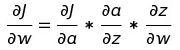

here, a = sigmoid( z ) and z = wx + b.

## Logistic Regression

In [22]:
class LogisticRegression() :
    def __init__( self, learning_rate, iterations ) :
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    # Function for model training
    def fit( self, X, Y ) :
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        # weight initialization
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y
        
        # gradient descent learning       
        for i in range( self.iterations ) :
            self.update_weights()
        return self
    
    # Helper function to update weights in gradient descent
    def update_weights( self ) :
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
        
        # calculate gradients
        tmp = ( A - self.Y.T )
        tmp = np.reshape( tmp, self.m )
        dW = np.dot( self.X.T, tmp ) / self.m
        db = np.sum( tmp ) / self.m
        
        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        
        return self
    
    # Hypothetical function h(x)
    def predict( self, X ) :
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )
        Y = [1 if i > 0.5 else 0 for i in Z]
        return Y

In [23]:
if __name__ == "__main__":
    
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    regressor = LogisticRegression(learning_rate=0.01, iterations=1000)
    regressor.fit(x_train_binary, y_train)
    predictions = regressor.predict(x_test_binary)

    print("Logistic Regression classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.82576


In [24]:
# to compare our model's accuracy with sklearn model
from sklearn.linear_model import LogisticRegression

In [26]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train_binary, y_train)
predictions = logisticRegr.predict(x_test_binary)

print("Logistic Regression classification accuracy:", accuracy(y_test, predictions))

C:\Users\Johnny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression classification accuracy: 0.85812
